In [61]:
import pandas as pd
from pycaret.nlp import *

In [2]:
df_train = pd.read_csv('dataset/Corona_NLP_train.csv', encoding='latin-1')
df_test = pd.read_csv('dataset/Corona_NLP_test.csv', encoding='latin-1')

In [3]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [19]:
df_train['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [21]:
def sentiment_encoder(sentiment:str):
    if sentiment == 'Extremely Negative':
        return -2
    elif sentiment == 'Negative':
        return -1
    elif sentiment == 'Neutral':
        return 0
    elif sentiment == 'Positive':
        return 1
    elif sentiment == 'Extremely Positive':
        return 2
df_train['encoded_sentiment'] = df_train.apply(lambda row: sentiment_encoder(row['Sentiment']),axis=1)

In [22]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,encoded_sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,1
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,1
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,-2


Description,Value
session_id,3461
Documents,41157
Vocab Size,36129
Custom Stopwords,True


IntProgress(value=0, description='Processing: ', max=11)

Output()

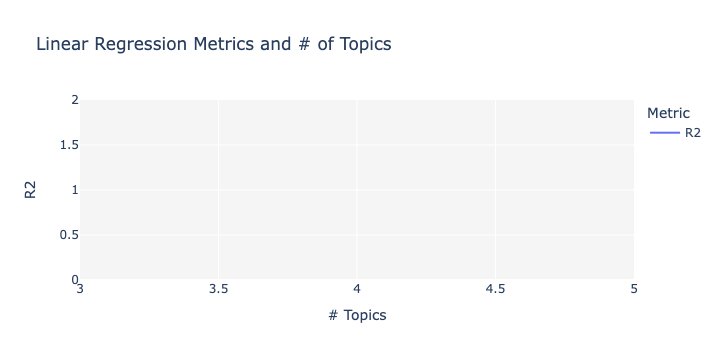

Best Model: Latent Dirichlet Allocation | # Topics: 4 | R2 : 1.0


In [24]:
# supervised
exp_name = setup(data = df_train, target = 'OriginalTweet', custom_stopwords=['covid', 'coronavirus', 'virus', 'pandemic', 'https', 'co'])
tuned_lda = tune_model(model = 'lda', supervised_target = 'encoded_sentiment', custom_grid=[4])

In [40]:
tuned_lda

In [42]:
pycaret.nlp.save_model(tuned_lda, 'tuned_lda', verbose=True)

Model Succesfully Saved


(<gensim.models.ldamodel.LdaModel at 0x7fb75d890eb0>, 'tuned_lda.pkl')

In [62]:
saved_lda = load_model('tuned_lda')

Model Sucessfully Loaded


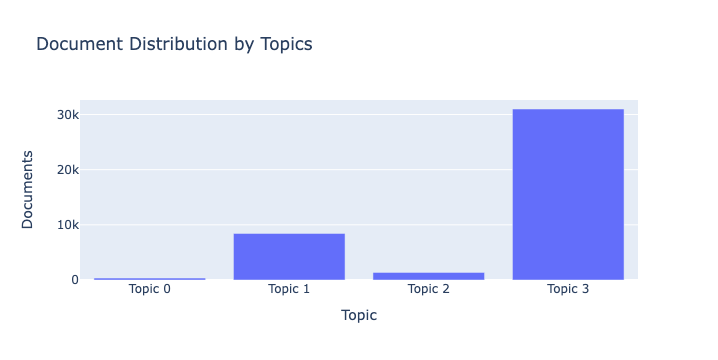

In [63]:
plot_model(saved_lda, plot = 'topic_distribution')

In [26]:
lda_df = assign_model(tuned_lda)

In [37]:
%store lda_df

Stored 'lda_df' (DataFrame)


In [29]:
lda_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,encoded_sentiment,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,3799,48751,London,16-03-2020,chrisitv,Neutral,0,0.156953,0.299030,0.166625,0.377392,Topic 3,0.38
1,3800,48752,UK,16-03-2020,advice talk family exchange phone number creat...,Positive,1,0.444629,0.228631,0.093634,0.233107,Topic 0,0.44
2,3801,48753,Vagabonds,16-03-2020,give elderly_disable dedicated shopping hour,Positive,1,0.284236,0.287950,0.130590,0.297224,Topic 3,0.30
3,3802,48754,NaN,16-03-2020,food stock empty panic enough food take nee st...,Positive,1,0.090304,0.289617,0.096071,0.524009,Topic 3,0.52
4,3803,48755,NaN,16-03-2020,go supermarket outbreak paranoid food stock em...,Extremely Negative,-2,0.152644,0.219368,0.187600,0.440388,Topic 3,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,airline offer stock shelf,Neutral,0,0.174666,0.236632,0.182901,0.405801,Topic 3,0.41
41153,44952,89904,NaN,14-04-2020,provide cite relate delay yet prompt reject po...,Extremely Negative,-2,0.128580,0.365202,0.093611,0.412607,Topic 3,0.41
41154,44953,89905,NaN,14-04-2020,know get tough kameronwild ration help,Positive,1,0.115775,0.379800,0.122387,0.382038,Topic 3,0.38
41155,44954,89906,NaN,14-04-2020,wrong start turn,Neutral,0,0.184421,0.305701,0.137307,0.372571,Topic 3,0.37


In [27]:
from pycaret.classification import *
classification = setup(data = lda_df,  
                 target = 'Sentiment',
                train_size = 0.8,
                fold_strategy = 'kfold',
                ignore_features=['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'Dominant_Topic', 'Perc_Dominant_Topic'],
                normalize = True,
                 normalize_method = 'robust')

,Description,Value
0,session_id,1663
1,Target,Sentiment
2,Target Type,Multiclass
3,Label Encoded,"Extremely Negative: 0, Extremely Positive: 1, Negative: 2, Neutral: 3, Positive: 4"
4,Original Data,"(41157, 13)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [28]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.4550
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2720
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0300
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0650
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0890
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0370
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.5310
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.6150
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,24.5800
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7510


In [48]:
from sklearn.model_selection import train_test_split
lda_train, lda_test = train_test_split(lda_df, test_size=0.2, random_state=42)

In [55]:
from pycaret.classification import *
classification = setup(data = lda_train,  
                 target = 'encoded_sentiment',
                train_size = 0.8,
                fold_strategy = 'kfold',
                ignore_features=['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'Topic_0', 'Topic_1', 'Topic_2','Topic_3'],
                normalize = True,
                 normalize_method = 'robust')

,Description,Value
0,session_id,733
1,Target,encoded_sentiment
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(32925, 13)"
5,Missing Values,True
6,Numeric Features,1
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [50]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.2820
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4320
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0570
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0310
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0770
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0440
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7580
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6860
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,5.8190
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5970


In [56]:
# from pycaret.classification import *
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


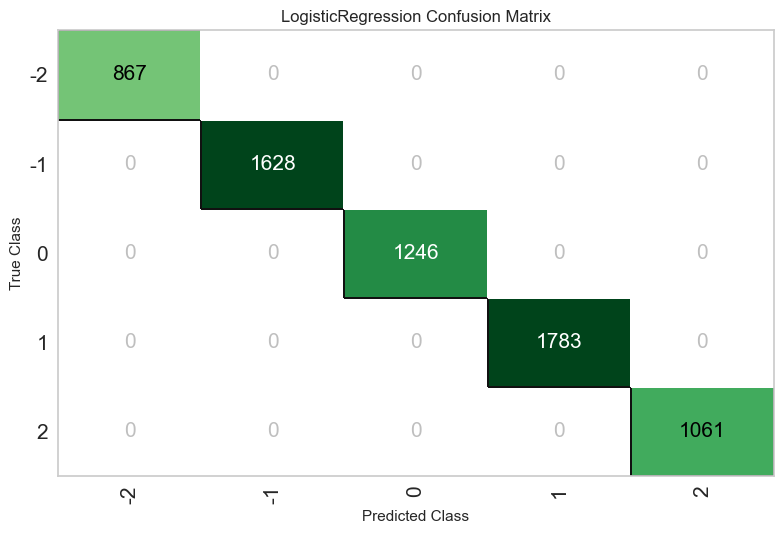

In [57]:
plot_model(lr, plot = 'confusion_matrix')

In [58]:
pred_unseen = predict_model(lr, data = lda_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [65]:
save_model(lr, 'saved_lr_model', verbose=True)

Model Succesfully Saved


(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=733, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'saved_lr_model.pkl')